In [329]:
 import pandas as pd

datos = pd.read_csv('U4_01_housing.csv')


In [330]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [331]:
datos.value_counts('ocean_proximity')

# 1, 2, 3, 4, 5

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [332]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:

#muestra información interesante, en relación a los datos (medias, %, etc)
#datos_na


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

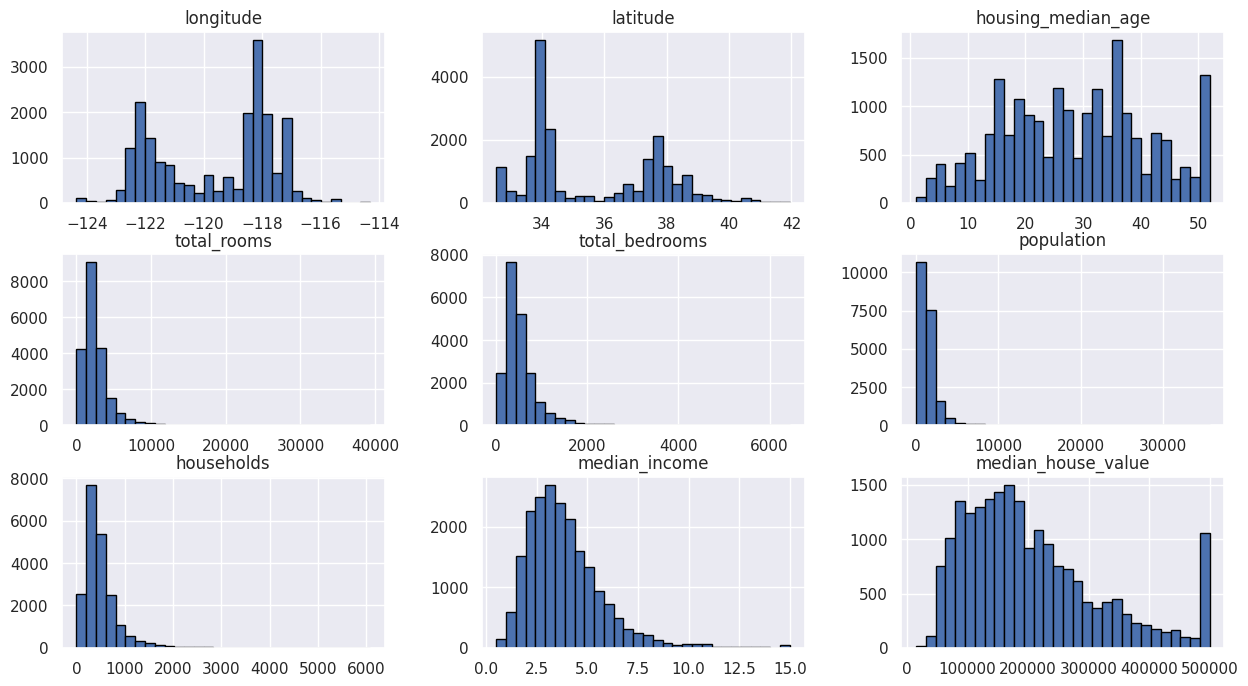

In [333]:
# figsize: dimensiones de las figuras
# bins: cambiar el # de columnas en el histograma
# edgecolor: aplica un color al borde

datos.hist( figsize=(15,8), bins=30, edgecolor = 'black' ) # represanta la informacion en histogramas

In [334]:
datos_na = datos.dropna() # eliminar los registros nulos

In [335]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

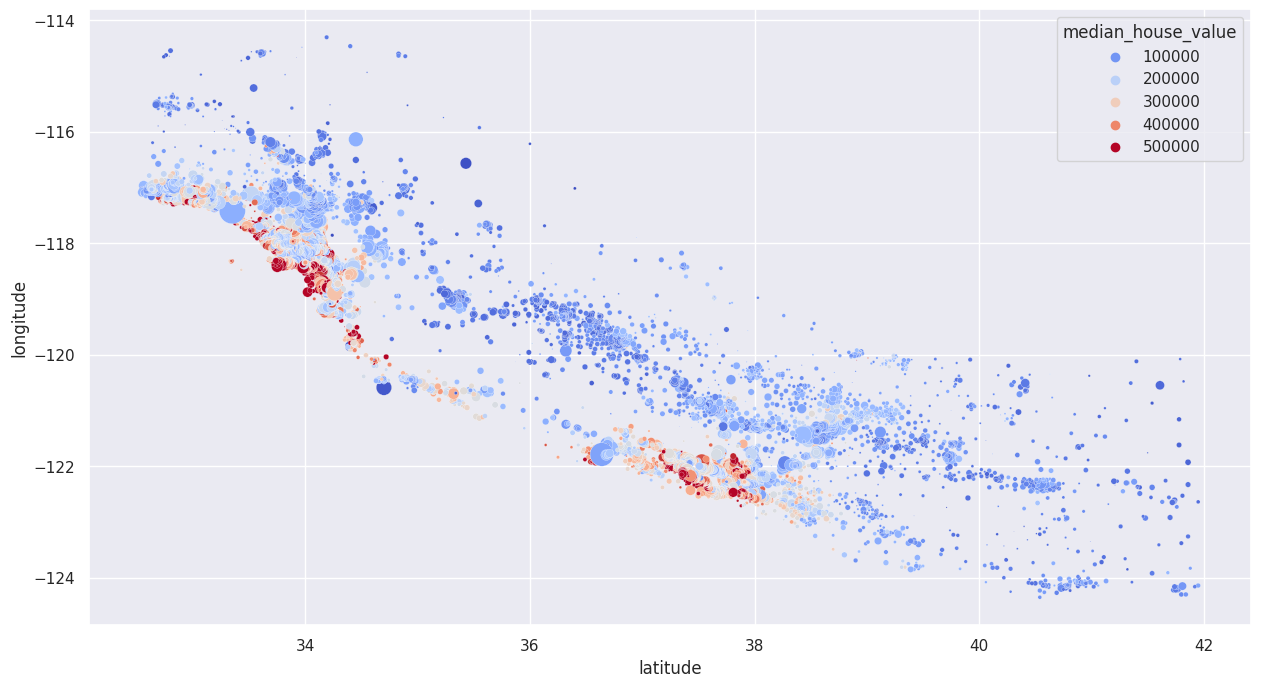

In [336]:
# graficar los datos
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos_na, hue='median_house_value', s=datos_na['population']/100, palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

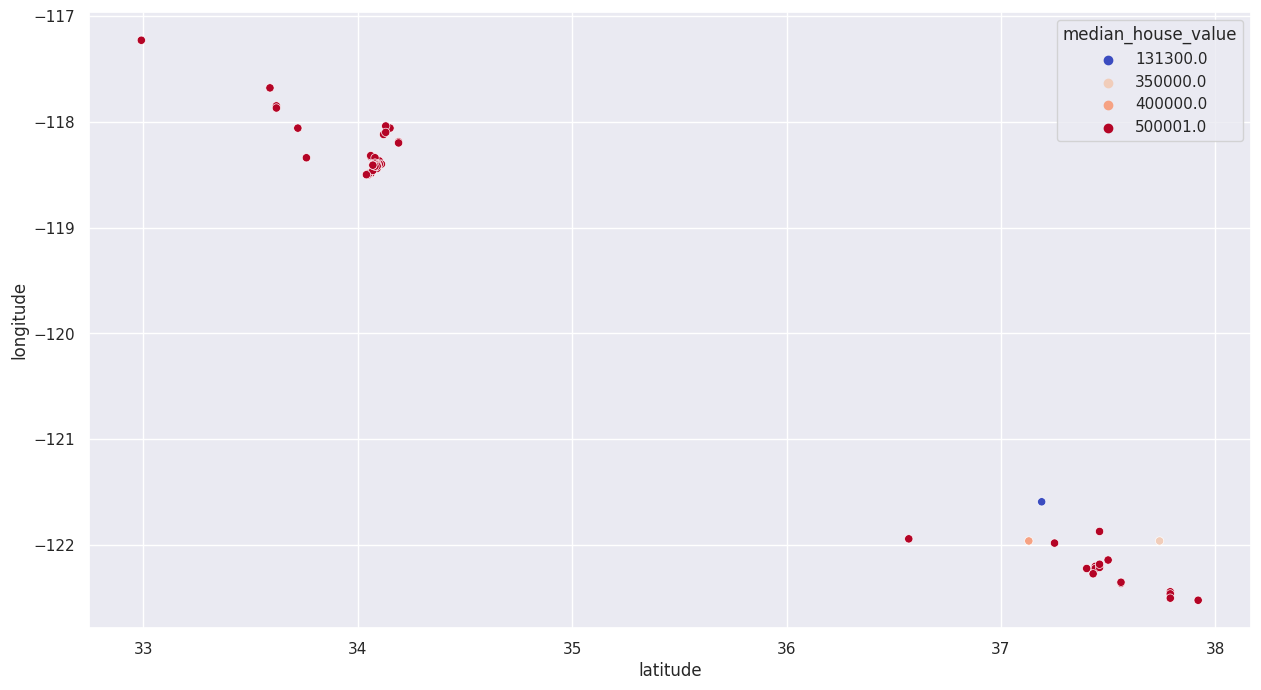

In [337]:
sb.scatterplot(x='latitude', y='longitude', data=datos_na[datos_na.median_income > 14], hue='median_house_value', palette='coolwarm')

In [338]:
# Dummies

# 1, 2, 3, 4, 5
#   NEAR BAY    INLAND    ISLAND
#       1         0          0
#       0         0          1

dummies= pd.get_dummies(datos_na['ocean_proximity'], dtype=int)


In [339]:
#union de los dummies al dataframe
datos_na = datos_na.join(dummies)

In [340]:
#eliminar la columna que no necesito
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

In [341]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

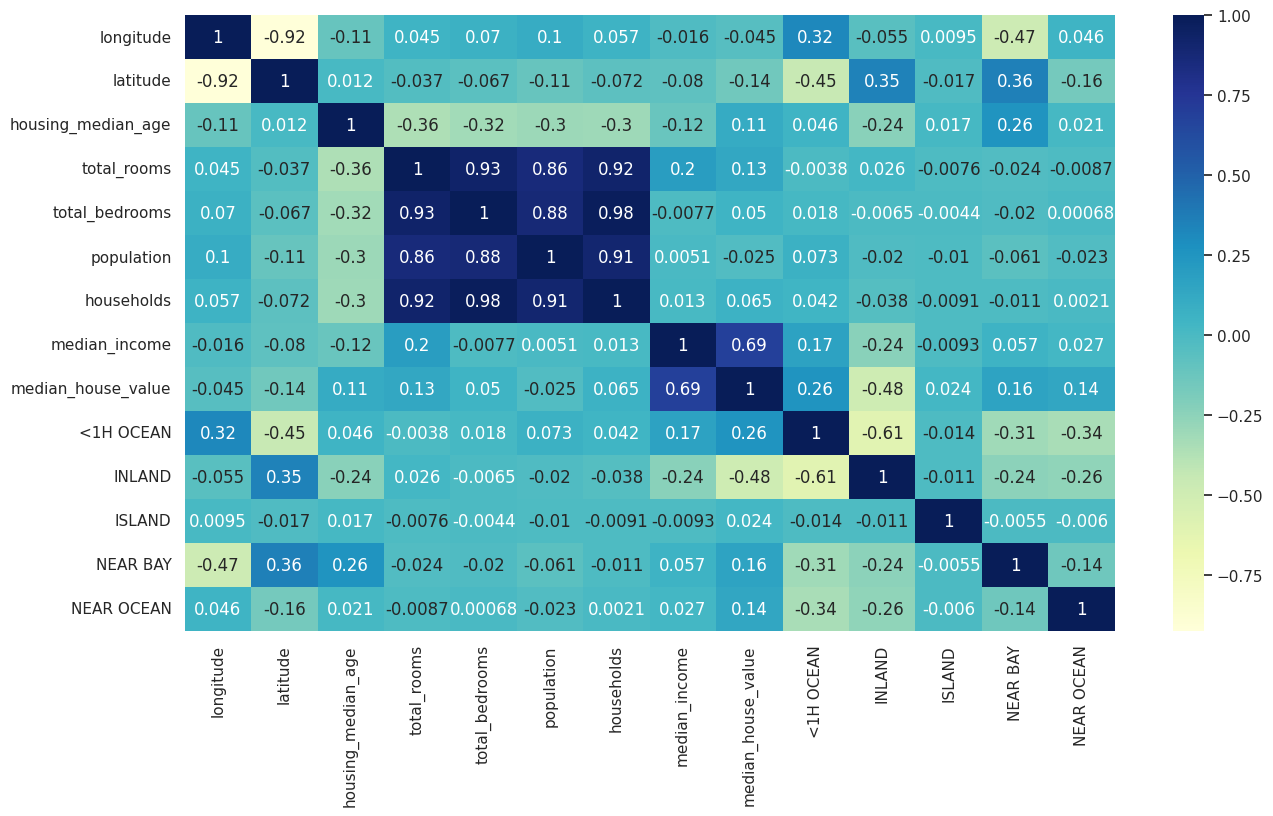

In [342]:
#diagrama de correlaciones

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [343]:
#valores correlacionados del median_house_value

datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-343-4a987637d184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

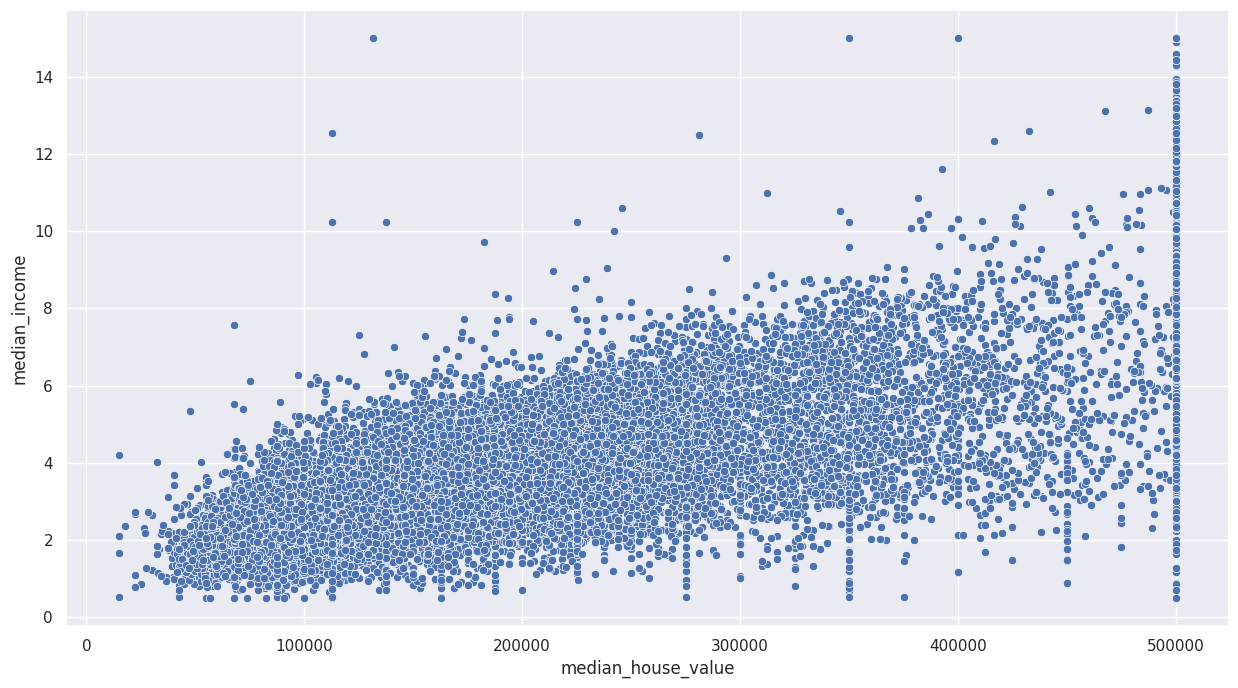

In [344]:
# grafica de relacion entre el valor de la casa y los ingresos

sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

In [345]:
#agregar caracteristica de ratio de habitaciones de dormir

datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']

In [346]:
#agregar caracteristica de ratio
datos_na['p_hh_ratio'] = datos_na['population'] /  datos_na['households']
datos_na['tr_pp_ratio'] = datos_na['total_rooms'] /  datos_na['population']

In [347]:
datos_na['mi_pp_ratio'] = datos_na['median_income'] /  datos_na['population']

In [348]:
datos_na['lg_mhvalue_ratio'] = datos_na['longitude'] /  datos_na['median_house_value']

In [350]:
datos_na['lt_mhvalue_ratio'] = datos_na['latitude'] /  datos_na['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,p_hh_ratio,tr_pp_ratio,mi_pp_ratio,lg_mhvalue_ratio,lt_mhvalue_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,0.146591,2.555556,2.732919,0.025855,-0.000270,0.000084
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,0.155797,2.109842,2.956685,0.003457,-0.000341,0.000106
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,0.129516,2.802260,2.957661,0.014632,-0.000347,0.000107
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,0.184458,2.547945,2.283154,0.010113,-0.000358,0.000111
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,0.172096,2.181467,2.879646,0.006807,-0.000357,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0,0.224625,2.560606,1.970414,0.001847,-0.001550,0.000506
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0,0.215208,3.122807,1.957865,0.007182,-0.001572,0.000512
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0,0.215173,2.325635,2.238332,0.001688,-0.001313,0.000427
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0,0.219892,2.123209,2.510121,0.002520,-0.001432,0.000466


<Axes: >

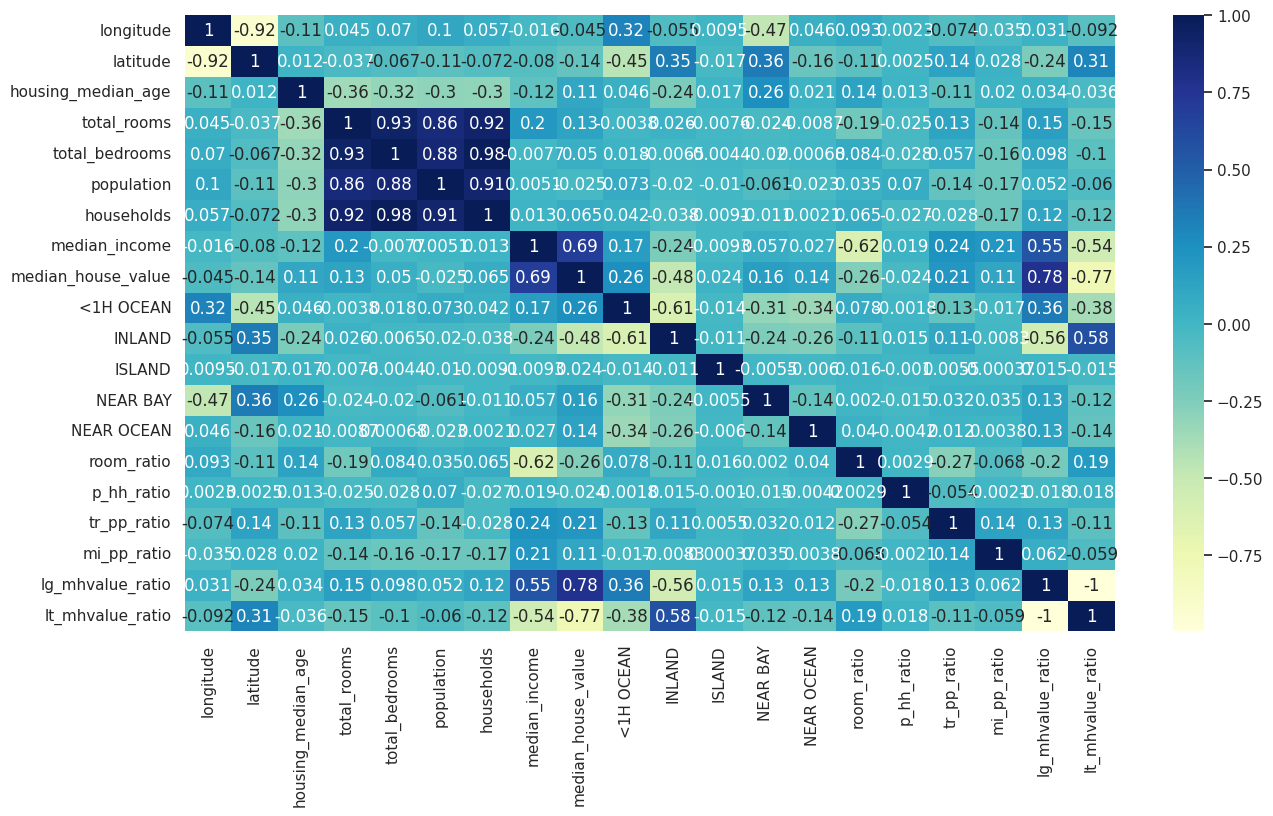

In [351]:

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [352]:
datos_na = datos_na[(datos_na['housing_median_age'] < 50)]

In [353]:
# separar las caracteristicas

#caracteristicas de entrada???
X = datos_na.drop(['median_house_value'], axis=1) #eliminar una columna

#la etiqueta de salida o resultado
y = datos_na['median_house_value']

In [354]:
# separar el conjunto de caracteristicas en datos de prueba y entrenamiento

from sklearn.model_selection import train_test_split

# IMPORTANTE!!

# primero son las caracteristicas de entrada para entrenamiento y prueba
# luego etiquetas de salida para entrenamiento y prueba

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.25)

In [355]:
#entrenar el modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train) # ocurre el entrenamiento

LinearRegression()

In [356]:
# reralizar las predicciones

predicciones = modelo.predict(X_test)


In [357]:


comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
20388,382598.264736,452100.0
13485,164513.150927,133200.0
12537,166874.403536,137200.0
13136,136570.996029,95900.0
6409,331638.222721,366000.0
...,...,...
14175,177318.671046,137300.0
1614,342939.016151,402600.0
3038,103931.494741,82800.0
19587,189208.636775,175000.0


In [358]:
print(modelo.score(X_train, y_train))

print(modelo.score(X_test, y_test))

0.7771417177046412
0.7749939698566397


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error( y_test, predicciones )

mse = np.sqrt(mse)

mse


65222.22922656104

In [ ]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

pd.DataFrame(X_train_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.630261,-0.773253,0.627801,-0.858457,-0.809457,-0.364276,-0.814101,-0.401908,1.094101,-0.702682,-0.008675,-0.304250,-0.385694,0.720113
1,0.691051,-0.824928,0.716565,-0.747486,-0.856055,-0.885817,-0.850058,0.844978,1.094101,-0.702682,-0.008675,-0.304250,-0.385694,-0.672357
2,-1.249170,0.668958,-0.526133,0.378532,0.660718,0.024477,0.629310,-0.417087,-0.913992,-0.702682,-0.008675,-0.304250,2.592731,0.414875
3,-0.332251,0.147507,-0.082312,-1.194088,-1.256800,-1.262340,-1.284109,-0.798151,-0.913992,1.423119,-0.008675,-0.304250,-0.385694,-0.802383
4,-0.073892,0.485745,-0.881190,-0.179948,-0.366773,-0.111805,-0.295295,0.077790,-0.913992,1.423119,-0.008675,-0.304250,-0.385694,-0.734649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285,-0.347449,1.683672,-0.526133,-0.090718,-0.203680,-1.003753,-0.934813,0.052493,-0.913992,1.423119,-0.008675,-0.304250,-0.385694,-0.477633
13286,-1.391014,1.044778,1.515443,0.128507,0.378799,0.708508,0.262037,-0.789843,-0.913992,-0.702682,-0.008675,3.286768,-0.385694,0.469918
13287,0.645459,-0.834324,1.870499,-0.415931,-0.117473,0.393137,-0.107805,-1.004687,-0.913992,-0.702682,-0.008675,-0.304250,2.592731,1.210109
13288,-1.163051,0.650167,-0.792426,-0.734350,-0.480939,-0.371265,-0.500763,-0.987645,1.094101,-0.702682,-0.008675,-0.304250,-0.385694,1.900402
